In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')

# Importando dataset

In [4]:
df = pd.read_csv('Customers.csv', index_col=0)
df.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6


In [95]:
map = {"Gender":"Gender",
       "Age":"Age",
       "Annual Income ($)":"AnnualIncome",
       "Spending Score (1-100)":"SpendingScore",
       "Profession":"Profession",
       "Work Experience":"WorkExperience",
       "Family Size":"Family Size"}

df.rename(columns=map, inplace=True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 1 to 2000
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          1965 non-null   object
 1   Age             1965 non-null   int64 
 2   AnnualIncome    1965 non-null   int64 
 3   SpendingScore   1965 non-null   int64 
 4   Profession      1965 non-null   object
 5   WorkExperience  1965 non-null   int64 
 6   Family Size     1965 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 187.4+ KB


In [97]:
df.isnull().sum()

Gender            0
Age               0
AnnualIncome      0
SpendingScore     0
Profession        0
WorkExperience    0
Family Size       0
dtype: int64

In [98]:
categorical = df.dtypes[df.dtypes == 'object'].index
df[categorical].describe().T

,count,unique,top,freq
Gender,1965,2,Female,1166
Profession,1965,9,Artist,612


In [99]:
for i in df[categorical]:
    print(f"{i} possui {df[i].nunique()} elementos distintos:")
    print(f'{df[i].unique()}')
    print()

Gender possui 2 elementos distintos:
['Male' 'Female']

Profession possui 9 elementos distintos:
['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing']



# Analisando casos onde a profissão está como dado ausente

In [100]:
df.query('Profession.isnull()', engine='python').describe().T

,count,mean,std,min,25%,50%,75%,max
Age,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AnnualIncome,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SpendingScore,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WorkExperience,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family Size,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Annual Income

In [101]:
#annual income
df.groupby('Profession').describe()['AnnualIncome'].T.loc[['mean','50%','std']]

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
mean,108776.580065,111573.217391,111161.240223,110650.333333,113770.130719,112574.041298,108758.616667,110995.838028,107994.211765
50%,105211.000000,111871.000000,112766.000000,109446.000000,112957.000000,111717.000000,100387.000000,113338.500000,120899.000000
std,45430.821575,48261.233502,46503.822115,45001.884572,45434.149328,45426.143104,40393.442633,47793.706749,48772.573140


percebe-se que os valores são próximos, então fica difícil de afirmar que as profissões ausentes seriam alguma em específico pelo atributo acima

## Score

In [102]:
#score
df.groupby('Profession').describe()['SpendingScore'].T.loc[['mean','50%','std']]

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
mean,52.678105,51.900621,48.966480,52.940171,49.901961,50.516224,46.383333,48.859155,48.717647
50%,52.000000,50.000000,47.000000,53.000000,49.000000,51.000000,45.500000,49.000000,46.000000
std,28.404190,27.437703,27.733868,26.455985,28.102202,28.344492,28.394373,27.718594,28.924208


percebe-se que os valores são próximos, então fica difícil de afirmar que as profissões ausentes seriam alguma em específico pelo atributo acima

## Age

In [103]:
#age
df.groupby('Profession').describe()['Age'].T.loc[['mean','50%','std']]

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
mean,49.004902,46.621118,55.094972,51.162393,46.601307,47.843658,45.366667,47.753521,45.823529
50%,47.000000,48.000000,58.000000,50.000000,45.000000,47.000000,41.000000,48.000000,38.000000
std,28.238839,28.771067,28.626556,29.384372,28.321077,27.256871,27.938168,28.360693,29.819367


pela mediana da idade se aproxima mais de engenheiros

## Analise geral de quantidade

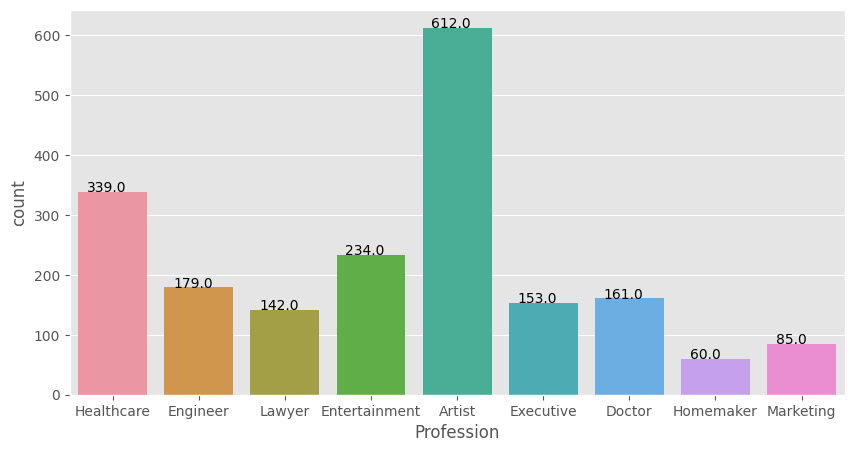

In [65]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x='Profession')
for p in ax.patches:
    plt.annotate(p.get_height(), xy=(p.get_x()+0.1, p.get_height()))

preencher os valores pela moda?

### Quantidade de valores nulos

In [68]:
df.Profession.isnull().sum()/df.shape[0]*100

1.7500000000000002

Como representa apenas 1.75% dos casos, vou optar para realizar o primeiro modelo retirando esses dados

In [69]:
df.dropna(how='any', inplace=True)

In [70]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

# Variáveis numéricas

In [104]:
numerical = df.dtypes[df.dtypes != 'object'].index
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1965.0,48.894656,28.414889,0.0,25.0,48.0,73.0,99.0
AnnualIncome,1965.0,110616.009669,45833.860195,0.0,74350.0,109759.0,149095.0,189974.0
SpendingScore,1965.0,51.078880,27.977176,0.0,28.0,50.0,75.0,100.0
WorkExperience,1965.0,4.092621,3.926459,0.0,1.0,3.0,7.0,17.0
Family Size,1965.0,3.757252,1.968335,1.0,2.0,4.0,5.0,9.0


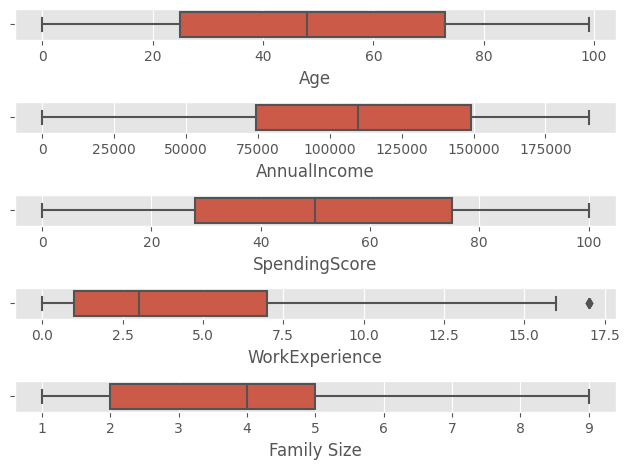

In [105]:
for i,n in enumerate(df[numerical].columns,start=1):
    plt.subplot(len(df[numerical].columns),1,i)
    sns.boxplot(x=df[n])
    plt.tight_layout()

Apenas a variável spending score está apresentando um outlier

In [119]:
Q1 = np.quantile(df['SpendingScore'],0.25)
Q3 = np.quantile(df['SpendingScore'],0.75)
IQR = Q3-Q1

left = Q1 - 1.5*IQR
right= Q3 + 1.5*IQR

df = df.query(f'SpendingScore > {left} and SpendingScore < {right}')
df.shape

(1965, 7)

# Gráficos

<Axes: >

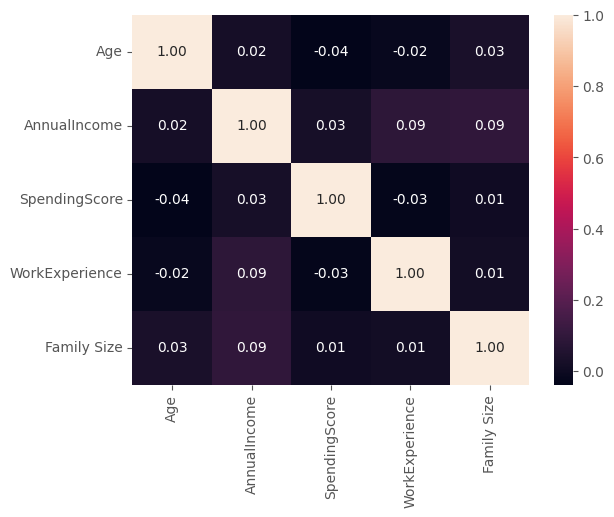

In [123]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

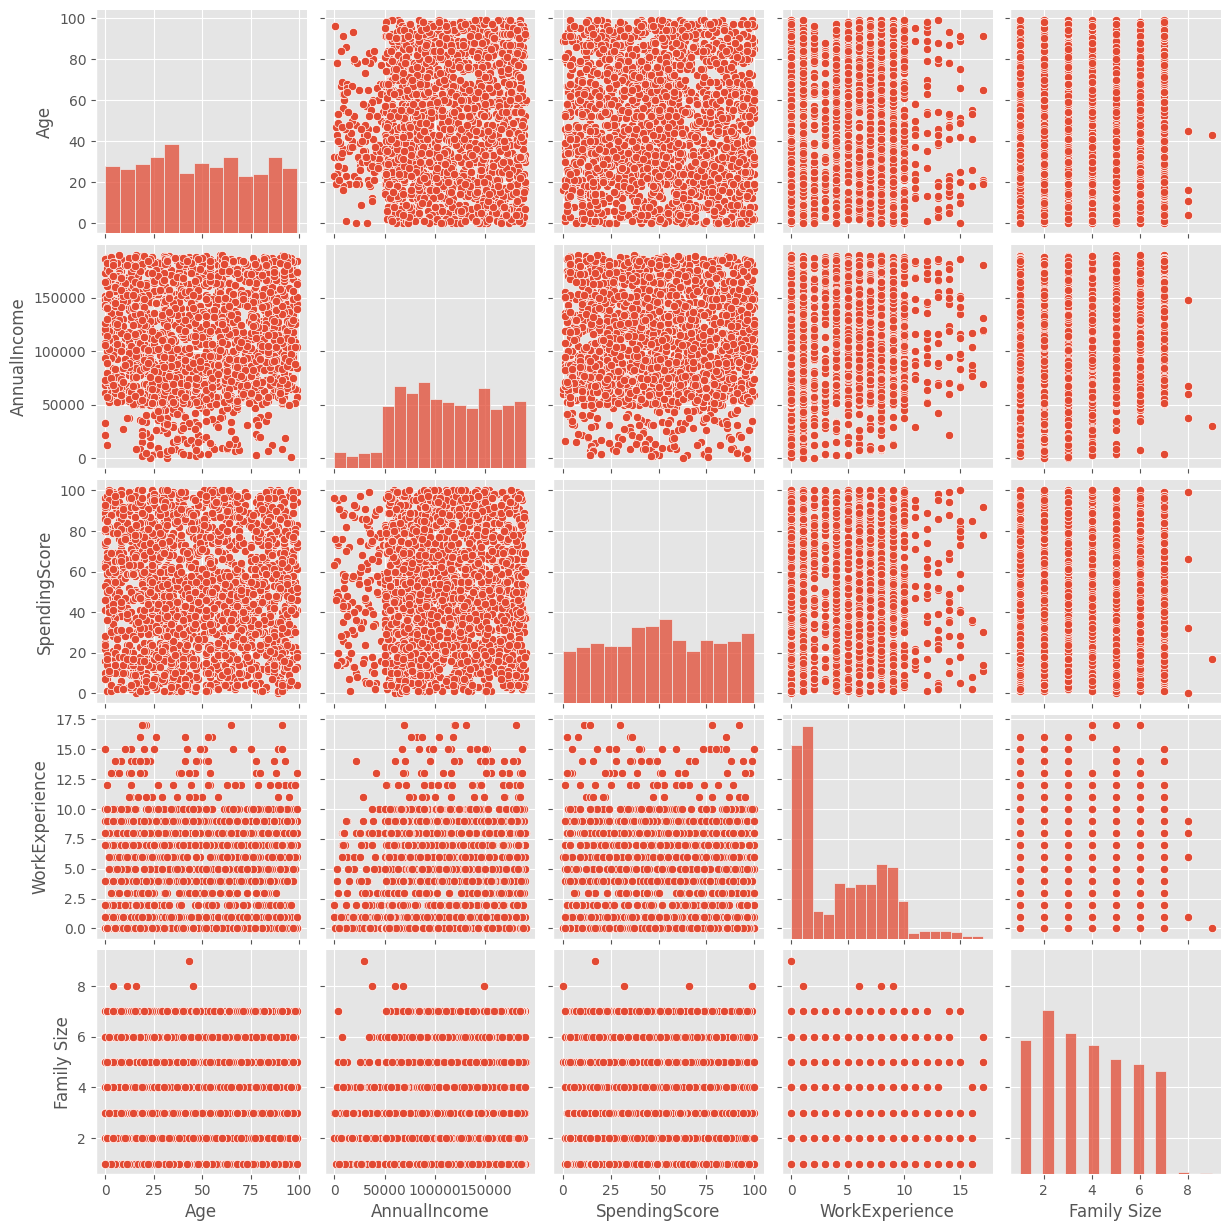

In [125]:
sns.pairplot(df)

# Kmean

In [155]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [168]:
scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])
df.head()


,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,Family Size
CustomerID,,,,,,,
1,1,-1.052345,-2.086675,-0.431850,5,-0.787837,0.123358
2,1,-0.981941,-1.650205,1.069755,2,-0.278342,-0.384815
3,0,-1.017143,-0.537207,-1.611684,2,-0.787837,-1.401161
4,0,-0.911538,-1.126441,0.926745,7,-1.042584,-0.892988
5,0,-0.629924,-1.584734,-0.396098,3,-0.533089,1.139704


In [169]:
le = LabelEncoder()
for col in df[categorical].columns:
    df[col] = le.fit_transform(df[col])
df.head()

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,Family Size
CustomerID,,,,,,,
1,1,-1.052345,-2.086675,-0.431850,5,-0.787837,0.123358
2,1,-0.981941,-1.650205,1.069755,2,-0.278342,-0.384815
3,0,-1.017143,-0.537207,-1.611684,2,-0.787837,-1.401161
4,0,-0.911538,-1.126441,0.926745,7,-1.042584,-0.892988
5,0,-0.629924,-1.584734,-0.396098,3,-0.533089,1.139704


In [170]:
wcss1 = []
range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df)
  wcss1.append(kmeans.inertia_)

In [171]:
df_wcss1 = pd.DataFrame(wcss1)
df_wcss1.rename(columns={0:'WCSS'}, inplace = True)
df_wcss1['diff'] = df_wcss1.diff()
df_wcss1

,WCSS,diff
0,23019.681934,NaN
1,13302.762055,-9716.919879
2,11559.352102,-1743.409952
3,10742.375306,-816.976797
4,10073.307130,-669.068176
5,9636.806046,-436.501084
6,9174.107883,-462.698163
7,8843.377493,-330.730390
8,8566.634170,-276.743323
9,8286.126135,-280.508035


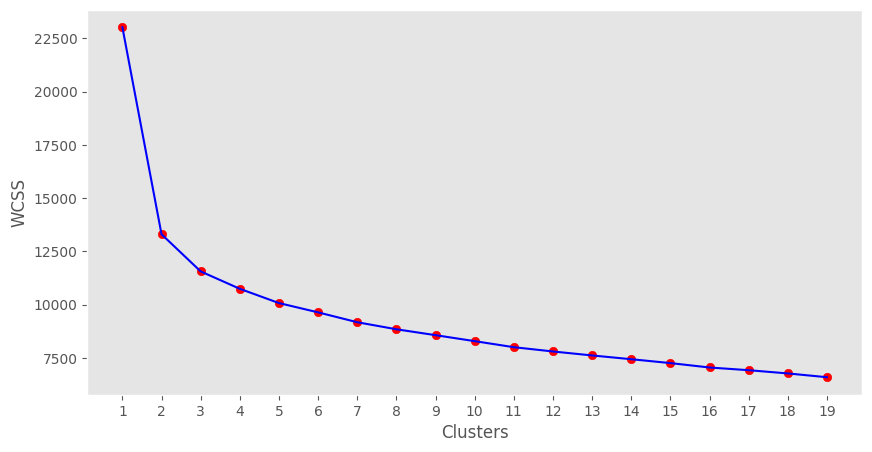

In [172]:
fig = plt.figure(figsize=(10,5))
plt.plot(range_values, wcss1, color='blue')
plt.scatter(range_values, wcss1, color='r')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.xticks(range_values)
plt.grid()
plt.show()

3 ou 4 clusters seria o número ideal para o dataset

In [173]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
labels = kmeans.labels_
print(labels)

[2 3 3 ... 2 2 3]


In [174]:
centroides = kmeans.cluster_centers_
cluster_centers = pd.DataFrame(data = centroides, columns = [df.columns])
cluster_centers.head()

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,Family Size
0,0.379310,-0.098255,-0.045615,-0.122132,7.195402,-0.013834,-0.118073
1,0.393273,-0.013597,-0.027431,0.051387,0.208279,0.036055,-0.050854
2,0.422780,-0.041687,0.059468,-0.019109,4.754826,0.033453,0.136111
3,0.428571,0.139827,0.005582,0.004971,2.566586,-0.100698,-0.000917


In [179]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
df_cluster.head()

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,Family Size,cluster
1,1.0,-1.052345,-2.086675,-0.431850,5.0,-0.787837,0.123358,3.0
2,1.0,-0.981941,-1.650205,1.069755,2.0,-0.278342,-0.384815,3.0
3,0.0,-1.017143,-0.537207,-1.611684,2.0,-0.787837,-1.401161,0.0
4,0.0,-0.911538,-1.126441,0.926745,7.0,-1.042584,-0.892988,3.0
5,0.0,-0.629924,-1.584734,-0.396098,3.0,-0.533089,1.139704,1.0


In [191]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df)
pca_df = pd.DataFrame(data = principal_comp, columns=['PCA1','PCA2'])
pca_df.head()

,PCA1,PCA2
0,2.182572,1.934137
1,-0.856039,1.597684
2,-0.806290,1.712331
3,4.140490,1.904408
4,0.194826,0.833186


In [193]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,PCA1,PCA2,cluster
0,2.182572,1.934137,2
1,-0.856039,1.597684,3
2,-0.806290,1.712331,3
3,4.140490,1.904408,0
4,0.194826,0.833186,3


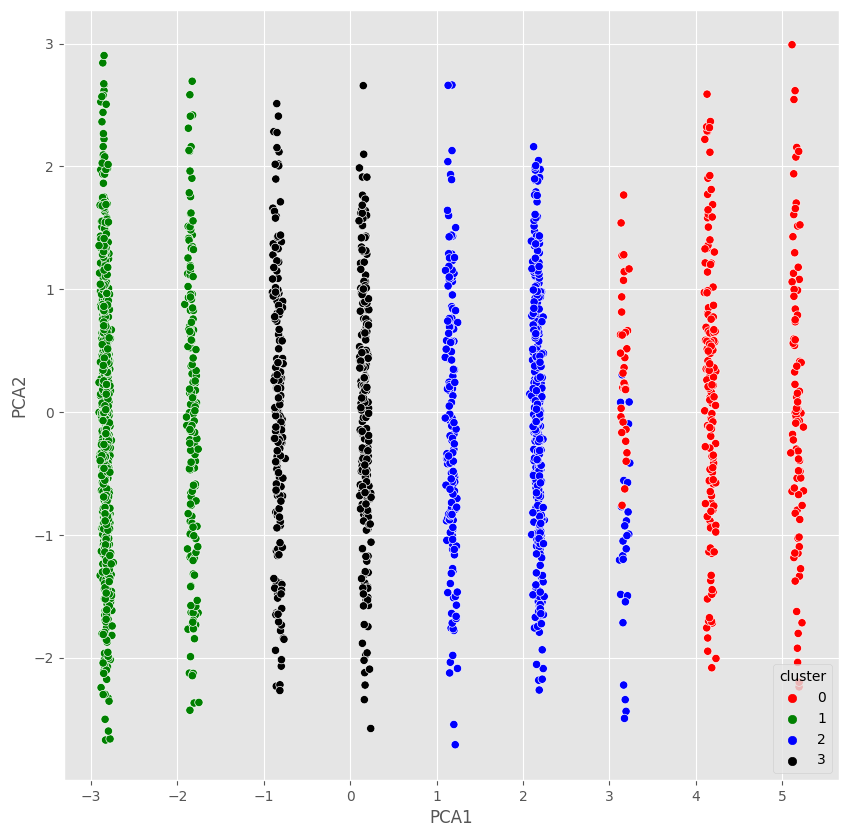

In [195]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='PCA1',y='PCA2', hue='cluster', data=pca_df, palette=['red','green','blue','k']);